In [10]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
from tabulate import tabulate

import os
print(f'cpu_count: {os.cpu_count()}')

# data_path = '../Dataset_Cleaned/'
model_path = '../04_Model_Saved/'
if os.path.exists(os.path.abspath(model_path)):
    print(f"{os.path.abspath(model_path)} exists.")
else:
    print(f"{os.path.abspath(model_path)} does not exist.")


cpu_count: 40
/nethome/home3/yuxiang.wu/v6_A-B-C-D-E_Sputtering/CCA_CALPHAD_SSS_ML/CCA_representation_ML/04_Model_Saved exists.


### Reading excel files exported from BO in subdirectories


In [8]:
def is_expected_format(filename):
    return filename.startswith('hypertable_NN_full_RepeatedKFold_v3_bo_ens_') and filename.endswith('.xlsx')


def read_excel_file(filepath, dfs):
    df = pd.read_excel(filepath)
    dfs.append(df)


hypertable_list = []

# iterate through all the numbers from 1 to 10
for i in range(1, 11):
    filename = f'hypertable_NN_full_RepeatedKFold_v3_bo_ens_{i}.xlsx'

    # Iterate through all subdirectories and files in the parent folder
    for root, dirs, files in os.walk(model_path):
        # Check if the file matches the expected format
        if is_expected_format(filename):
            if filename in files:
                filepath = os.path.join(root, filename)
                print(filename)
                read_excel_file(filepath, hypertable_list)


hypertable_NN_full_RepeatedKFold_v3_bo_ens_1.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_2.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_3.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_4.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_5.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_6.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_7.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_8.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_9.xlsx
hypertable_NN_full_RepeatedKFold_v3_bo_ens_10.xlsx


In [9]:
display(hypertable_list[0].head())


,Unnamed: 0,score_r2_HC,score_r2_HC_best,score_loss_HC,score_r2_H,score_r2_C,score_loss_H,score_loss_C,NNF_num_nodes,NNH_num_nodes,...,NNF_num_layers,NNH_num_layers,NNC_num_layers,NNF_dropout,NNH_NNC_dropout,loss_class,learning_rate_H,learning_rate_C,batch_size_H,N_epochs_local
0,0,0.662969,0.662969,0.089480,0.628446,0.697492,0.089480,0.065517,64,32,...,2,2,3,0.147796,0.204392,1,0.000395,0.006415,128,4
1,1,0.600592,0.662969,0.019226,0.528420,0.672764,0.019226,0.011166,256,64,...,4,2,2,0.309920,0.192406,0,0.008843,0.001351,32,3
2,2,0.631453,0.662969,0.014557,0.615513,0.647394,0.014557,0.012007,32,32,...,7,1,1,0.133449,0.313379,0,0.005454,0.006933,64,2
3,3,0.505570,0.662969,0.093788,0.593564,0.417576,0.093788,0.106004,32,256,...,7,5,7,0.466745,0.479975,1,0.004535,0.006513,128,1
4,4,0.634800,0.662969,0.094295,0.610722,0.658879,0.094295,0.074533,256,64,...,1,2,8,0.464179,0.297224,1,0.008932,0.003604,16,3


### plot ensembling of BO search


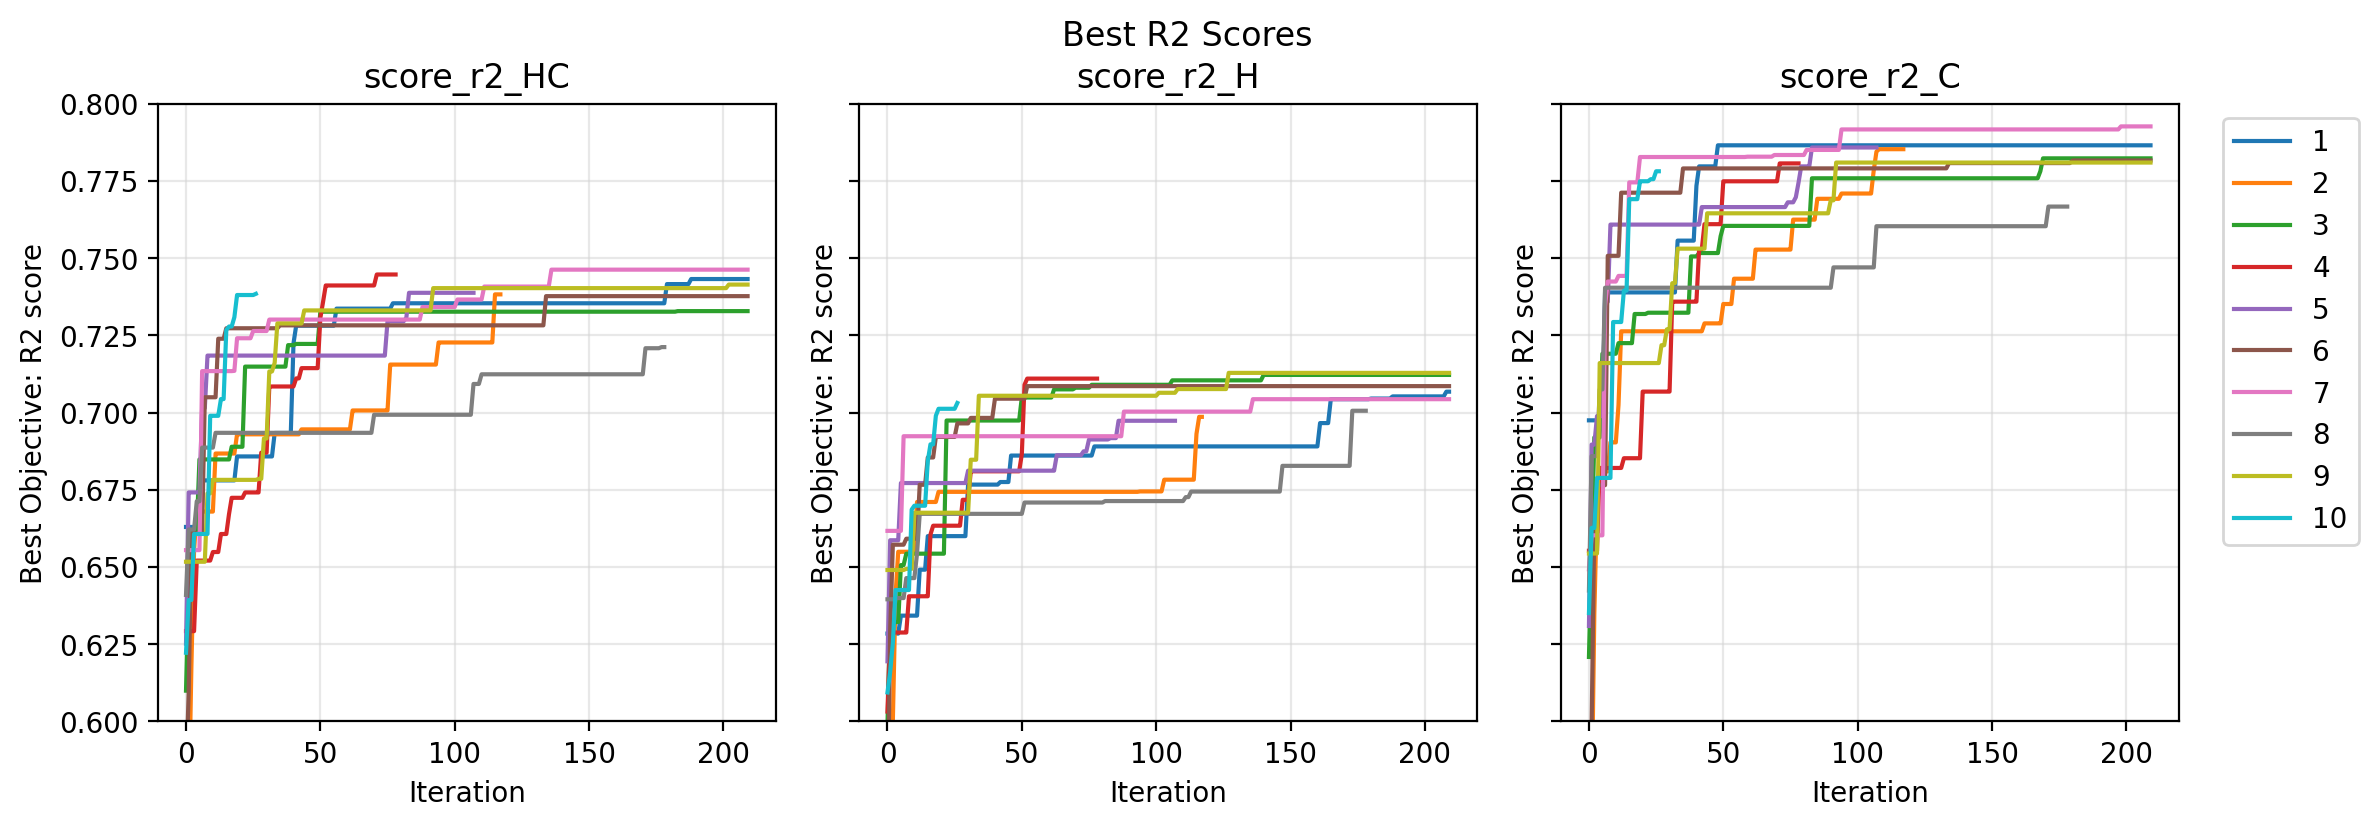

In [ ]:
def plot_best_r2_score(ax, col_name, hypertable, legend_label=None):
    data = hypertable[col_name].values
    best_scores = np.maximum.accumulate(data)
    ax.plot(best_scores, label=legend_label,
            linestyle='-', alpha=1)  # , marker='o'
    ax.set_title(col_name)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Best Objective: R2 score')
    ax.set_ylim([0.6, 0.8])
    ax.grid(alpha=0.5, color='lightgrey')
    ax.set_box_aspect(1)
    if legend_label is not None:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(
    12, 4), sharex=True, sharey=True, dpi=200)

for i in range(0, 10):

    hypertable = hypertable_list[i]
    bo_ens_num = i+1

    # Call the function for each column and subplot
    col_names = ['score_r2_HC', 'score_r2_H', 'score_r2_C']
    for j, (ax, col_name) in enumerate(zip(axs, col_names)):
        legend_label = f'{bo_ens_num}' if j == 2 else None
        plot_best_r2_score(ax, col_name, hypertable, legend_label)

# Add a title to the figure
fig.suptitle(f'Best R2 Scores')

# Add a legend outside the data box for the last subplot
axs[-1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as a file
plt.savefig(model_path+'v3_BO_score_r2_individual.png')
fig.tight_layout()
plt.show()

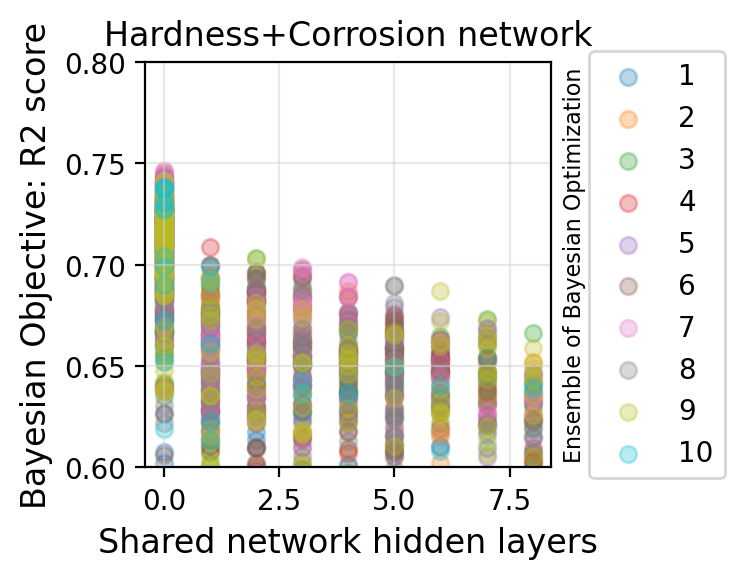

In [ ]:
# Create a figure with a single subplot
fig, axs = plt.subplots(1, 1, figsize=(
    8, 3), sharex=True, sharey=True, dpi=200)

# Plot the data for each BO ensemble on the same subplot
for i in range(0, 10):
    hypertable = hypertable_list[i]
    bo_ens_num = i+1

    legend_label = f'{bo_ens_num}'

    axs.scatter(hypertable_list[i]['NNF_num_layers'], hypertable_list[i]
                ['score_r2_HC'], label=legend_label, alpha=0.3)

# Set the axis labels, grid, and box aspect
axs.set_xlabel('Shared network hidden layers', fontsize=12)
axs.set_ylabel('Bayesian Objective: R2 score', fontsize=12)
axs.set_ylim([0.6, 0.8])
axs.grid(alpha=0.5, color='lightgrey')
axs.set_box_aspect(1)
# axs.tick_params(axis='both', which='major', labelsize = 12)  # Set size of x and y axis numbers (ticks)
axs.set_title('Hardness+Corrosion network', fontsize=12)


# Create a legend outside the data box for the last subplot
legend = axs.legend(bbox_to_anchor=(1.06, 1.06), loc='upper left')

# Add annotation text next to the legend, rotated and aligned vertically on the left side of the legend
axs.text(1.03, 0.5, 'Ensemble of Bayesian Optimization',
         fontsize=8,
         transform=axs.transAxes,
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')


# Save and show the figure
fig.tight_layout()
plt.savefig(model_path+'v3_BO_score_r2 vs. NNF_num_layers.png')
plt.show()

### plot the mean+std of BO search ensembling


In [ ]:
# Define a function to pad the arrays
def pad_array(array):
    if len(array) <= 210:
        array = np.maximum.accumulate(array)
        max_value = np.max(array)
        padding_length = 210 - len(array)
        array = np.pad(array, (0, padding_length),
                       mode='constant', constant_values=max_value)
    return array


# Apply the function to the three lists of arrays
score_r2_HC_padded = [
    pad_array(hypertable_list[i]['score_r2_HC'].values) for i in range(10)]
score_r2_H_padded = [
    pad_array(hypertable_list[i]['score_r2_H'].values) for i in range(10)]
score_r2_C_padded = [
    pad_array(hypertable_list[i]['score_r2_C'].values) for i in range(10)]

# Compute the mean and standard deviation of the padded arrays
mean_score_r2_HC = np.mean(score_r2_HC_padded, axis=0)
std_score_r2_HC = np.std(score_r2_HC_padded, axis=0)
mean_score_r2_H = np.mean(score_r2_H_padded, axis=0)
std_score_r2_H = np.std(score_r2_H_padded, axis=0)
mean_score_r2_C = np.mean(score_r2_C_padded, axis=0)
std_score_r2_C = np.std(score_r2_C_padded, axis=0)

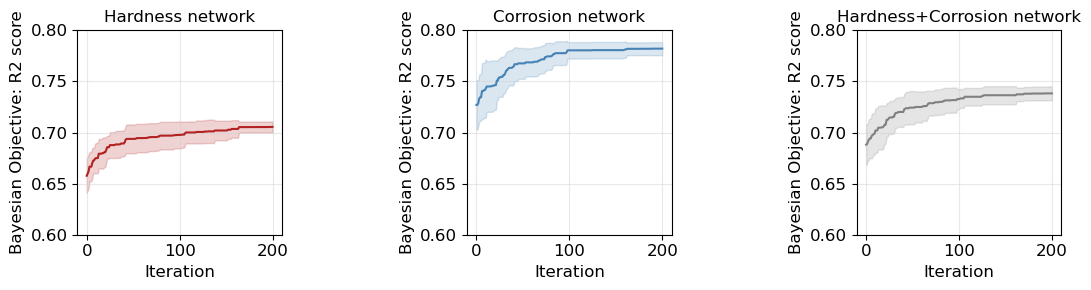

In [ ]:
# Define a function to plot the best R2 score for a given column name
def plot_best_avg_r2_score(ax, col_name, mean_score_r2, std_score_r2, color):
    ax.plot(mean_score_r2, color=color)
    ax.fill_between(np.arange(mean_score_r2.shape[0]),
                    mean_score_r2-std_score_r2, mean_score_r2+std_score_r2, color=color, alpha=0.2)
    # You can also set font size for the title.
    ax.set_title(col_name, fontsize=12)
    ax.set_xlabel('Iteration', fontsize=12)
    ax.set_ylabel('Bayesian Objective: R2 score', fontsize=12)
    ax.set_ylim([0.6, 0.8])
    ax.grid(alpha=0.5, color='lightgrey')
    ax.set_box_aspect(1)
    # Set size of x and y axis numbers (ticks)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # ax.legend()


# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharex=True, sharey=False)

# Call the function for each column and subplot
col_names = ['Hardness network', 'Corrosion network',
             'Hardness+Corrosion network']
colors = ['firebrick', 'steelblue', 'grey']
mean_score_r2_list = [mean_score_r2_H[9:],
                      mean_score_r2_C[9:], mean_score_r2_HC[9:]]
std_score_r2_list = [std_score_r2_H[9:],
                     std_score_r2_C[9:],  std_score_r2_HC[9:]]

for ax, col_name, mean_score_r2, std_score_r2, color in zip(axs, col_names, mean_score_r2_list, std_score_r2_list, colors):
    plot_best_avg_r2_score(ax, col_name, mean_score_r2, std_score_r2, color)

fig.tight_layout()
plt.savefig(model_path+'v3_BO_score_r2_AVG.png')  # Save the plot as a file
plt.show()